In [231]:
#Refrence: https://www.youtube.com/watch?v=eMOA1pPVUc4&t=4534s&pp=ygUcZGF0YSBzY2llbmNlIHBhbmRhcyBUZWNodHJlaw%3D%3D

In [ ]:
import pandas as pd
import os

In [232]:
# Merging 12 months of sales data into a single file:

df = pd.read_csv("./SalesAnalysis/Sales_Data/Sales_April_2019.csv") #reading file for 1 month

files = [file for file in os.listdir("./SalesAnalysis/Sales_Data")] #reading files for each month in sales_data

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./SalesAnalysis/Sales_Data/" + file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv("all_data.csv", index= False)

In [233]:
all_data = pd.read_csv("all_data.csv")
all_data = all_data.dropna(how="all") #removes empty rows from dataframe
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [237]:
#Had some rows where all_data at Order Date was just a str Order Date, so I dropped those by:
or_df = all_data[all_data["Month"] == "Or"].index #Obtaining those rows's indexes
all_data = all_data.drop(or_df) #Dropping them

In [238]:
# Convert columns to correct datatype (str,int,float)
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])
all_data["Order ID"] = pd.to_numeric(all_data["Order ID"])
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])

In [245]:
#Augment data with additional columns:
#1. Add month column:

all_data["Month"] = all_data["Order Date"].str[0:2]
all_data["Month"] = all_data["Month"].astype("int32")
#all_data["Month"] = all_data["Month"].apply(lambda x: c.month_abbr[x])
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [246]:
#Add a sales column
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]

#Add a city column
#use .apply() method to isolate the city from Purchase Address:
def get_city(address):
    return address.split(",")[1]

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data["City"] = all_data["Purchase Address"].apply(lambda x: f'{get_city(x)} {get_state(x)}')#.apply() method allows us to apply a function to specific data (in this case data in the "Purchase Address" column)
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [247]:
#What was best month for sales? How much was earned that month?
columns = ["Quantity Ordered", "Sales"]
sales_per_month = all_data.groupby("Month")[columns].agg("sum").sort_values(by="Sales", ascending=False)
sales_per_month.head(12)

,Quantity Ordered,Sales
Month,,
12,28114,4613443.34
10,22703,3736726.88
4,20558,3390670.24
11,19798,3199603.20
5,18667,3152606.75
3,17005,2807100.38
7,16072,2647775.76
6,15253,2577802.26
8,13448,2244467.88


C:\Users\toman\AppData\Local\Temp\ipykernel_142048\1233780097.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_per_city1 = all_data.groupby("Month").sum()["Sales"]


Text(0.5, 0, 'Month')

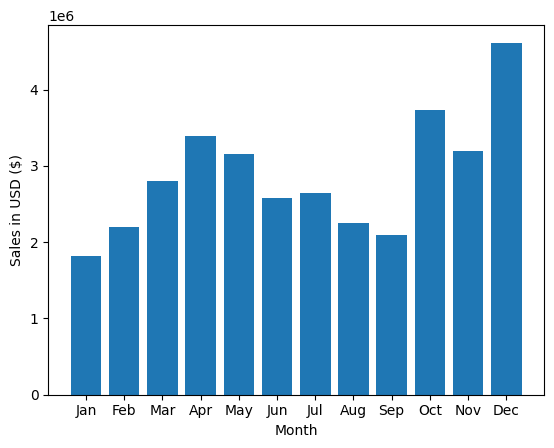

In [359]:
#Visualisation of data
import matplotlib.pyplot as plt
import calendar as c

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
temp = all_data['Month'].astype(int).apply(lambda x: c.month_abbr[x]).value_counts().reset_index()
temp.set_index('index', inplace=True)
temp = temp.reindex(index=months)

sales_per_city1 = all_data.groupby("Month").sum()["Sales"]

plt.bar(months, sales_per_city1)
plt.xticks(months)#Shows all 12 months
plt.ylabel("Sales in USD ($)")
plt.xlabel("Month")

In [360]:
#What city had the highest num of sales?
columns = ["Quantity Ordered", "Sales"]
quantity_per_city = all_data.groupby("City")[columns].agg("sum").sort_values(by="Quantity Ordered", ascending=False)
quantity_per_city.head(12)


,Quantity Ordered,Sales
City,,
San Francisco CA,50239,8262203.91
Los Angeles CA,33289,5452570.80
New York City NY,27932,4664317.43
Boston MA,22528,3661642.01
Dallas TX,16730,2767975.40
Atlanta GA,16602,2795498.58
Seattle WA,16553,2747755.48
Portland OR,11303,1870732.34
Austin TX,11153,1819581.75


C:\Users\toman\AppData\Local\Temp\ipykernel_142048\2873804598.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_per_city1 = all_data.groupby("City").sum()["Quantity Ordered"]


Text(0.5, 0, 'City')

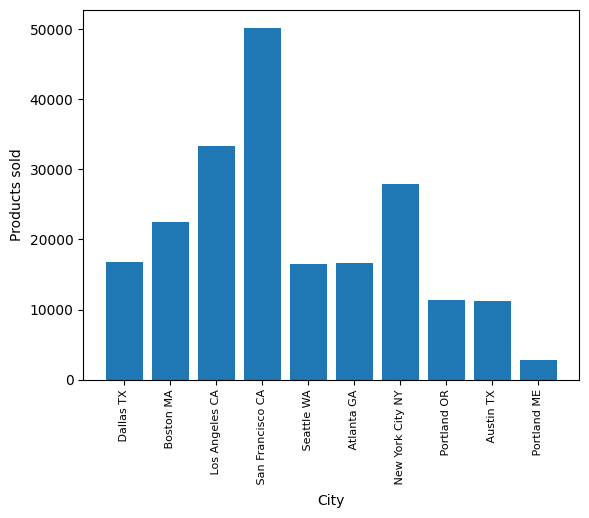

In [361]:
#Visualisation of data
import matplotlib.pyplot as plt

quantity_per_city1 = all_data.groupby("City").sum()["Quantity Ordered"]
cities = all_data["City"].unique()

plt.bar(cities, quantity_per_city1[cities])
plt.xticks(cities, rotation="vertical", size=8)#Shows all 12 months
plt.ylabel("Products sold")
plt.xlabel("City")

In [362]:
# What time should we display advertisement to maximize likelihood of customer's buying a product?
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])
all_data["Hour"] = all_data["Order Date"].dt.hour
all_data["Minute"] = all_data["Order Date"].dt.minute

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


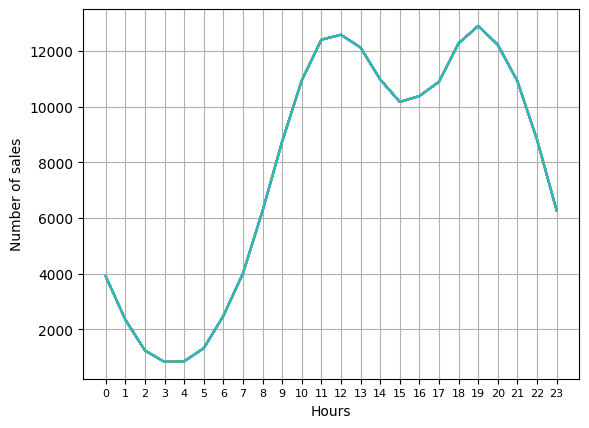

In [382]:
hours = [hour for hour,df in all_data.groupby("Hour")]

#Visualisation of data

plt.plot(hours, all_data.groupby("Hour").count()) #counts the amount of lines at a specific hour
plt.xticks(hours, size=8)
plt.xlabel("Hours")
plt.ylabel("Number of sales")
plt.grid()
plt.show()

In [411]:
#What products are most often sold together?
df = all_data[all_data["Order ID"].duplicated(keep=False)]

df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))

df = df[["Order ID", "Grouped"]].drop_duplicates()
df.head(20)


C:\Users\toman\AppData\Local\Temp\ipykernel_142048\3981154813.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


In [412]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list, 2)))


for key, value in count.most_common(10):
    print(f"{key}: {value}")


('iPhone', 'Lightning Charging Cable'): 1005
('Google Phone', 'USB-C Charging Cable'): 987
('iPhone', 'Wired Headphones'): 447
('Google Phone', 'Wired Headphones'): 414
('Vareebadd Phone', 'USB-C Charging Cable'): 361
('iPhone', 'Apple Airpods Headphones'): 360
('Google Phone', 'Bose SoundSport Headphones'): 220
('USB-C Charging Cable', 'Wired Headphones'): 160
('Vareebadd Phone', 'Wired Headphones'): 143
('Lightning Charging Cable', 'Wired Headphones'): 92


In [433]:
#Which product sold the most?

grouped_products = all_data.groupby("Product")
quantity_ordered = grouped_products.sum()["Quantity Ordered"].sort_values(ascending=False)

quantity_ordered.head(20)

C:\Users\toman\AppData\Local\Temp\ipykernel_142048\3314590068.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = grouped_products.sum()["Quantity Ordered"].sort_values(ascending=False)


Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64

C:\Users\toman\AppData\Local\Temp\ipykernel_142048\2701612979.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()["Quantity Ordered"]


Text(0.5, 0, 'Product')

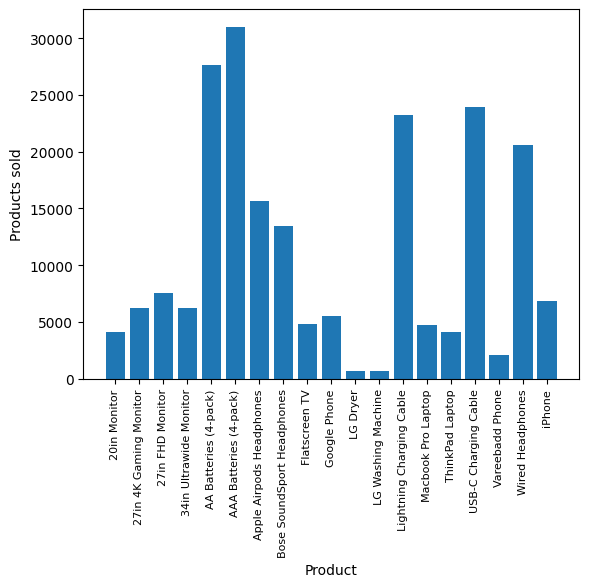

In [422]:
#Doing it in a way that enables me to visualize data:

product_group = all_data.groupby("Product")
quantity_ordered = product_group.sum()["Quantity Ordered"]

products = [product for product,df in product_group]

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation="vertical", size=8)
plt.ylabel("Products sold")
plt.xlabel("Product")



